## Secant method

#### Initiallizing : Clear all global variables if there are remaining variables in the previous work

In [77]:
# Initiallizing : Clear all global variables if there are remaining variables in the previous work
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]

#### Import modules

In [78]:
# Import modules
import os, sys, time, numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy as sp, scipy.optimize as opt

### About a function to find a root

#### function 1 : $x^2 - 4x - lnx$
Interval 1 : $[1; 2]$ <br>
Inverval 2 : $[2; 4]$

root 1 = 1.412391172025309, root 2 = 3.057103549994281


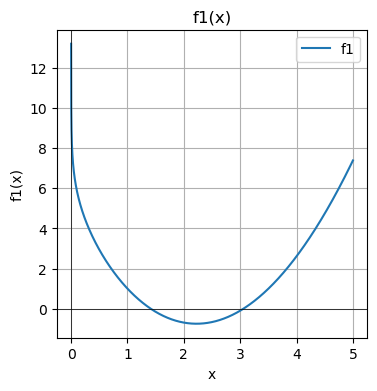

In [79]:
f1 = lambda x : np.power(x, 2) - 4*x + 4 - np.log(x)

############## Roots of function 1 ##############
interval_f1_1 = [1, 2]
interval_f1_2 = [2, 4]

r_interval_f1_1 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_1)
r_f1_1 = r_interval_f1_1.root

r_interval_f1_2 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_2)
r_f1_2 = r_interval_f1_2.root

print(f'root 1 = {r_f1_1}, root 2 = {r_f1_2}')

############## Plot function 1 ##############
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 5+.0001, .0001)
y = f1(x)
axes.plot(x, y, label='f1')
axes.set_title('f1(x)')
axes.set_xlabel('x')
axes.set_ylabel('f1(x)')
axes.legend()
axes.axhline(y=0, linewidth=0.5, color='k')
axes.axvline(x=0, linewidth=0.5, color='k')
axes.grid()

#### function 2 : $x + 1 - 2sin(pi*x)$
interval 1 : $[0; 0.5]$ <br>
interval 2 : $[0.5; 1]$

root 1 = 0.20603511957051523, root 2 = 0.6819748087382322


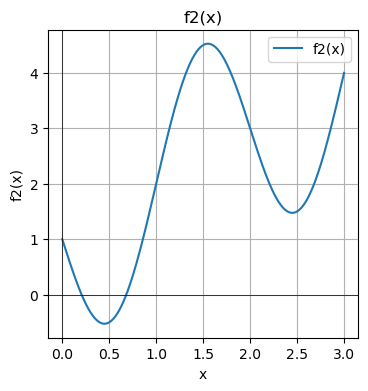

In [80]:
f2 = lambda x : x + 1 - 2*np.sin(np.pi*x)

############## Roots of function 2 ##############
interval_f2_1 = [0, .5]; x0_f2_1 = interval_f2_1[0]
interval_f2_2 = [.5, 1]; x0_f2_2 = interval_f2_2[0]

r_interval_f2_1 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_1)
r_f2_1 = r_interval_f2_1.root

r_interval_f2_2 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_2)
r_f2_2 = r_interval_f2_2.root

print(f'root 1 = {r_f2_1}, root 2 = {r_f2_2}')

############## Plot of function 2 ##############
figures1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 3+.0001, .0001)
y = f2(x)
axes1.plot(x, y, label='f2(x)')
axes1.set_title('f2(x)')
axes1.set_xlabel('x')
axes1.set_ylabel('f2(x)')
axes1.legend()
axes1.axhline(y=0, linewidth=.5, color='k')
axes1.axvline(x=0, linewidth=.5, color='k')
axes1.grid()

#### Method Test

In [81]:
# tol = 1e-5

# r0 = interval_f1_1[0]
# r1 = interval_f1_1[1]
# r_old = r0
# r_new = r1
# k = 0
# err = np.abs(r_new - r_old)
# while err > tol:
#     k = k + 1
#     r_older = r_old
#     r_old = r_new
#     r_new = r_old - f1(r_old)/(f1(r_old) - f1(r_older)/(r_old - r_older))
#     err = np.abs(r_new - r_old)
#     if err < tol:
#         print(f"Converged By Tolerance. {k:d}-th iteration / |r_new - r_old| = {err:.6f} / r = {r_new:.6f} / f(r) = {f1(r_new):.6f}")
#         break
#     else:
#         print(f"At {k:d}-th iteration : r_new is {r_new:.6f} and the |r_new - r_old| is {err:.6f}")

#### Define a Method

In [ ]:

def secant(func, r0, tol): # arg : root 찾으려는 함수 / 초기 두 guess / error tolerance
    r_new = r0 # 첫 번째 초기 guess
    k = 0 # iteration number 초기화
    err = 1 # 오차 초기화
    
    list_k, list_r, list_f = [k], [r0], [func(r0)] # Log 초기화 (iteration 번호, 근 근사값, 함수값)
    
    # Iteration Loop 시작
    while err > tol: # 오차가 tolerance보다 작아질 때까지 반복
        k = k + 1; list_k.append(k) # Iteration number update
        r_old = r_new # 
        r_perturbed = r_old - 1e-5 # set r_perturbed by applying small perturbation at the r_old
        r_new = r_old - func(r_old)/((func(r_old) - func(r_perturbed))/(r_old - r_perturbed)) # evaluate next iteration point
        list_r.append(r_new); list_f.append(func(r_new)) # 근사값 및 함수값 저장
        err = np.abs(r_new - r_old) # 오차 계산
        
        if err < tol: # 수렴 조건 만족 시
            print(f"Converged By Tolerance. {k:d}-th iteration / r = {r_new:.6f} / f(r) = {func(r_new):.6f} / |r_new - r_old| = {err:.6f}")
            return r_new, np.array(list_k), np.array(list_r), np.array(list_f)
        else: # 아직 수렴하지 않았을 경우 현재 상태 출력
            print(f"At {k:d}-th iteration : r_new is {r_new:.6f} and the |r_new - r_old| is {err:.6f}")


#### Method implementation

##### Root를 찾을 function 및 구간 먼저 선정

In [83]:
######### function / interval setting #########
idx_case = 1
if idx_case == 1:
    f = f1
    a0 = interval_f1_1[0]
    b0 = interval_f1_1[1]
    r = r_f1_1
elif idx_case == 2:
    f = f1
    a0 = interval_f1_2[0]
    b0 = interval_f1_2[1]
    r = r_f1_2
elif idx_case == 3:
    f = f2
    a0 = interval_f2_1[0]
    b0 = interval_f2_1[1]
    r = r_f2_1
else:
    f = f2
    a0 = interval_f2_2[0]
    b0 = interval_f2_2[1]
    r = r_f2_2

#### function 및 구간 선정 후 method로 root finding

In [84]:
result = secant(func=f, r0=a0, tol=1e-5)
result

At 1-th iteration : r_new is 1.333332 and the |r_new - r_old| is 0.333332
At 2-th iteration : r_new is 1.408579 and the |r_new - r_old| is 0.075247
At 3-th iteration : r_new is 1.412382 and the |r_new - r_old| is 0.003803
Converged By Tolerance. 4-th iteration / r = 1.412391 / f(r) = 0.000000 / |r_new - r_old| = 0.000010


(np.float64(1.4123911718982272),
 array([0, 1, 2, 3, 4]),
 array([1.        , 1.33333167, 1.40857865, 1.41238154, 1.41239117]),
 array([1.00000000e+00, 1.56765844e-01, 7.19805770e-03, 1.81474297e-05,
        2.36642539e-10]))

#### Error = r* - r

In [85]:
r_sequence = result[2]
err = np.abs(r_sequence - r)
err

array([4.12391172e-01, 7.90595054e-02, 3.81251716e-03, 9.63623702e-06,
       1.27081901e-10])

#### Error vs Iteration Plot
Secant method는 Newton method와 다르게 f(x) = 0이 되는 점을 잘 찾음.

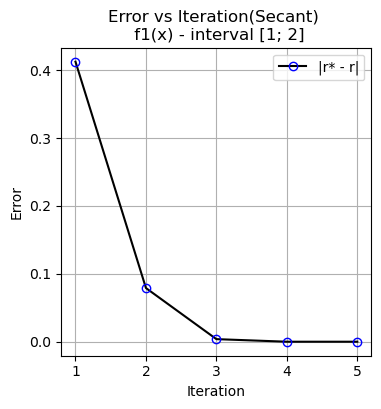

In [86]:
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.plot(np.arange(len(r_sequence))+1, err, 'o-', markerfacecolor='none', markeredgecolor='blue', color='black', label='|r* - r|')
axes.set_title(f'Error vs Iteration(Secant) \n f{idx_case//3 + 1}(x) - interval [{a0}; {b0}]')
axes.set_xlabel('Iteration')
axes.set_ylabel('Error')
axes.legend()
axes.grid()